In [19]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
import math

In [20]:
'''Set-Up Initial Conditions'''
def setupSimulation():
    sim = rebound.Simulation()
    sim.integrator = 'ias15'
    sim.units = ('yr','au','solarmass')
    smass = 1.0 #in Solar Mass units
    jmass = 0.000954588 #Jupiter Mass in Solar Mass units
    satmass = 0.0002857
    delta_critical = 2.40*(np.cbrt(2.0*jmass))
    sim.add(m = smass)
    sim.add(m = jmass, a= 0.3, r = (0.000477895/4), f = 0, hash="planet1")
    sim.add(m = jmass, a= (0.3 * (1+delta_critical)-0.002), r = (0.000477895/4), f = np.pi, hash="planet2")
    sim.move_to_com()
    return sim

In [21]:
jmass = 0.000954588 #Jupiter Mass in Solar Mass units
delta_critical = 2.40*(np.cbrt(2.0*jmass))
print(0.175 * (1+delta_critical))
print(0.175* (1+delta_critical) - 0.001)

0.22710322585282358
0.22610322585282358


3 particles in the simulation at t = 0.0 yr
Protoplanet 1 Semi-Major Axis: 0.2999999999999999 AU
Protoplanet 2 Semi-Major Axis: 0.38731981574769764 AU
Period of Protoplanet 1: 0.16424149785215406 yr
Period of Protoplanet 2: 0.24082335370276095 yr
True Anomaly of Protoplanet 1: 3.141592653589793 radians
True Anomaly of Protoplanet 2: 3.141592653589793 radians


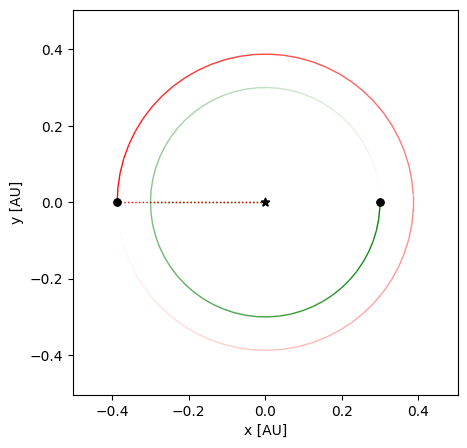

In [22]:
'''Conditions before collision'''
sim = setupSimulation()
tmax = 1e4
period1 = np.array([i.P for i in sim.calculate_orbits()])
omega1 = np.array([i.omega for i in sim.calculate_orbits()])
ecc = np.array([i.e for i in sim.calculate_orbits()])
p1 = period1[0]
p2 = period1[1]
f1 = omega1[0]
f2 = omega1[1]

print(f'{sim.N} particles in the simulation at t = {sim.t} yr')
print(f"Protoplanet 1 Semi-Major Axis: {sim.calculate_orbits()[0].a} AU")
print(f"Protoplanet 2 Semi-Major Axis: {sim.calculate_orbits()[1].a} AU")
print(f'Period of Protoplanet 1: {p1} yr')
print(f'Period of Protoplanet 2: {p2} yr')
print(f"True Anomaly of Protoplanet 1: {f1} radians")
print(f"True Anomaly of Protoplanet 2: {f2} radians")

fig = rebound.OrbitPlot(sim, unitlabel='[AU]', color=['green', 'red'], periastron=True)

In [23]:
'''Collision Resolve Function to count the number of close encounters'''
def close_encounter(sim_pointer, collision):
    global count
    global temp
    sim = sim_pointer.contents
    temp = temp + 1
    count = np.append(count, temp)
    return 0

In [24]:
sim = setupSimulation()
temp = 0
count = np.array([0])
sim.collision = "direct"
sim.collision_resolve = close_encounter
sim.integrate(tmax)
print(f"Number of Close Encounters: {count}")

Number of Close Encounters: [    0     1     2 ... 18846 18847 18848]


In [25]:
'''Merge Function'''
def my_merge(sim_pointer, collided_particles_index):
    global simulation_time
    sim = sim_pointer.contents 
    i = collided_particles_index.p1  
    j = collided_particles_index.p2 
    
    global simulation_time
    simulation_time = sim.t
    print(f"First Collision Occurs at time: {simulation_time} yr")
    total_mass = sim.particles[i].m + sim.particles[j].m
    merged_planet = (sim.particles[i] * sim.particles[i].m + sim.particles[j] * sim.particles[j].m)/total_mass 
    merged_radius = (sim.particles[i].r**3 + sim.particles[j].r**3)**(1/3)

    sim.particles[i] = merged_planet   
    sim.particles[i].m = total_mass    
    sim.particles[i].r = merged_radius 
    
    return 2

In [26]:
'''Merge Condition'''
sim = setupSimulation()
sim.collision = 'direct'
sim.collision_resolve = my_merge
sim.integrate(tmax)

period2 = np.array([i.P for i in sim.calculate_orbits()])
eccentricity = np.array([i.e for i in sim.calculate_orbits()])

First Collision Occurs at time: 56.85665431295052 yr


Eccentricity of Orbit 1: 0.2289406523713223
True Anomaly of Orbit 1: 5.536156528806562
Omega of Orbit 1: 5.394205491806956
SMA of Orbit 1: 91.77588767110117
Eccentricity of Orbit 2: 0.19322384148116528
True Anomaly of Orbit 2: 2.474118415886511
Omega of Orbit 2: 2.184990761685711
SMA of Orbit 2: 64.04148421887561


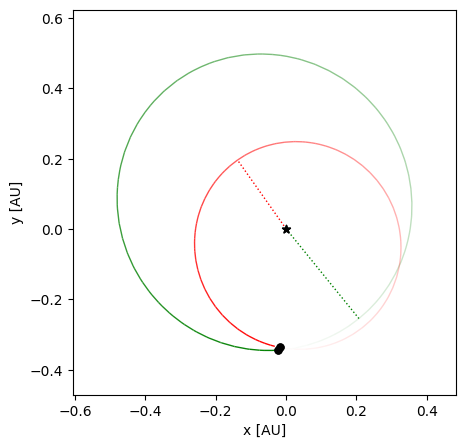

In [30]:
sim = setupSimulation()
sim.integrate(56.855)
fig = rebound.OrbitPlot(sim, unitlabel='[AU]', color=['green', 'red'], periastron=True)
print(f'Eccentricity of Orbit 1: {sim.calculate_orbits()[0].e}')
print(f'True Anomaly of Orbit 1: {sim.calculate_orbits()[0].f}')
print(f'Omega of Orbit 1: {sim.calculate_orbits()[0].omega}')
print(f'SMA of Orbit 1: {215.5032 * sim.calculate_orbits()[0].a}')
print(f'Eccentricity of Orbit 2: {sim.calculate_orbits()[1].e}')
print(f'True Anomaly of Orbit 2: {sim.calculate_orbits()[1].f}')
print(f'Omega of Orbit 2: {sim.calculate_orbits()[1].omega}')
print(f'SMA of Orbit 2: {215.5032 * sim.calculate_orbits()[1].a}')